### Install Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

### 데이터 준비

In [2]:
X = np.array([[1, 1, 1, 1], 
             [0, 0, 0, 0],
             
             [1, 0, 1, 0], 
             [0, 1, 0, 1], 
             
             [1, 0, 0, 1], 
             [0, 1, 1, 0], 
             
             [0, 0, 1, 1], 
             [1, 1, 0, 0]])

y = np.array([0, 0, 1, 1, 2, 2, 3, 3])

In [3]:
label = {0:'SOLID', 1:"VERTICAL", 2:"DIAGIONAL", 3:"HORIZONTAL"}

In [4]:
# 원핫인코딩
y = tf.keras.utils.to_categorical(y)

In [5]:
print(X.shape)
print(y.shape)

(8, 4)
(8, 4)


#### 모델 


In [6]:
from tensorflow.keras.layers import Dense, Dropout

In [7]:
model = tf.keras.Sequential([
    Dense(100, activation='relu', input_shape=(4, )),
    Dense(80, activation='relu'),
    Dense(50, activation='relu'),
    Dense(30, activation='relu'),
    Dense(X.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(X, y, epochs=30, verbose=2)

Epoch 1/30
1/1 - 1s - loss: 1.3929 - accuracy: 0.1250 - 712ms/epoch - 712ms/step
Epoch 2/30
1/1 - 0s - loss: 1.3771 - accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 3/30
1/1 - 0s - loss: 1.3618 - accuracy: 0.3750 - 3ms/epoch - 3ms/step
Epoch 4/30
1/1 - 0s - loss: 1.3476 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 5/30
1/1 - 0s - loss: 1.3353 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 6/30
1/1 - 0s - loss: 1.3239 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 7/30
1/1 - 0s - loss: 1.3129 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 8/30
1/1 - 0s - loss: 1.3014 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 9/30
1/1 - 0s - loss: 1.2895 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 10/30
1/1 - 0s - loss: 1.2789 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 11/30
1/1 - 0s - loss: 1.2679 - accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 12/30
1/1 - 0s - loss: 1.2572 - accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 13/30
1/1 - 0s - loss: 1.2463 - accuracy: 1.0000 - 2ms/epoch - 

In [9]:
model.evaluate(X, y)

1/1 [==============================] - 0s 95ms/step - loss: 0.9373 - accuracy: 1.0000


[0.9373378753662109, 1.0]

In [10]:
def plot_history():
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Training Loss')
    plt.title('loss plot', color='white')
    plt.legend()

    plt.show()

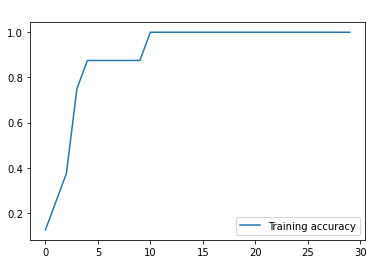

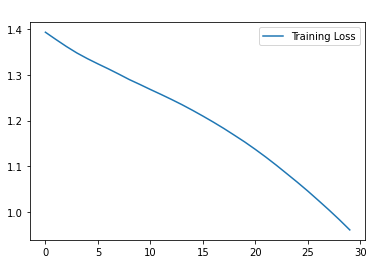

In [11]:
plot_history()

In [22]:
def predict(data):
    pred = np.argmax(model.predict(data, verbose=3))
    print(f'class: {label[pred]}')

In [23]:
predict([[0.1, 0.1, 
          0.1, 0.1]])

predict([[0.8, 0.05, 
          0.7, 0.13]]) 

predict([[0.7, 0.1, 
          0.1, 0.54]])

predict([[0.1, 0.1,
          0.5, 0.8]])


class: SOLID
class: VERTICAL
class: DIAGIONAL
class: HORIZONTAL
